<a href="https://colab.research.google.com/github/theclosedbook/GAN/blob/main/Fashion_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing dependencies
import tensorflow as tf
import tensorflow_datasets as tfds

from matplotlib import pyplot as plt

In [2]:
# use tf datsets api to load the data set
ds = tfds.load('fashion_mnist',split="train")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteDSJG6K/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteDSJG6K/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
ds.as_numpy_iterator().next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

In [4]:
ds.as_numpy_iterator().next()['label']

2

## Visualizing the data

In [5]:
# Importing numpy
import numpy as np

In [6]:
# Setup connection aka iterator
dataiterator = ds.as_numpy_iterator()

In [7]:
# Getting data out of the pipeline
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

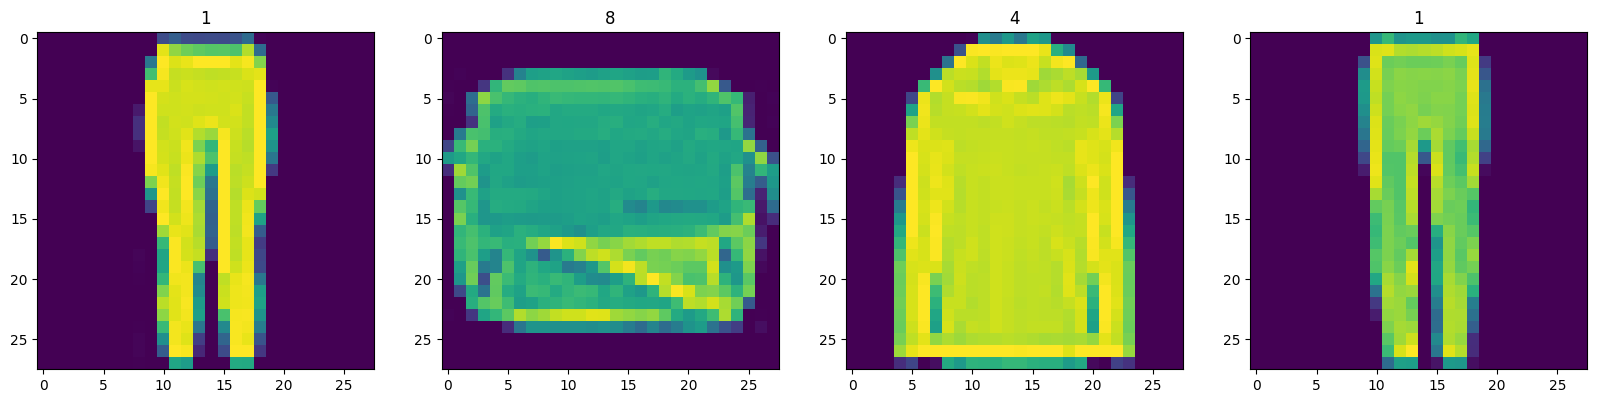

In [8]:
# Setup the subplot formatiing
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
  batch = dataiterator.next()
  ax[idx].imshow(np.squeeze(batch['image']))
  ax[idx].title.set_text(batch['label'])

In [9]:
# Scale and return image only
def scale_images(data):
  image=data['image']
  return image/255

In [10]:
# Reloaded the dataset
ds = tfds.load('fashion_mnist' , split = "train")
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
# Cache the dataset for the batch
ds = ds.cache()
# shuffle it up
ds = ds.shuffle(60000)
# Batch into 128 images per scale
ds = ds.batch(128)
# Reduces the liklehood of bottlenecking
ds = ds.prefetch(64)

In [11]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

## Importing modelling components

In [12]:
# Bring in the sequential api for the generator and the discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D , Dense , Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

## Building the generator

In [13]:
# Building the generator
def build_generator():
  model = Sequential()

  # Takes in random values and reshapes in to 7x7x128
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))


  # Upsamlpling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))


  # Upsamlpling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  # Conv block 1
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  # Conv block 2
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  # Conv layer to get to one channel
  model.add(Conv2D(1,4,padding='same',activation='sigmoid'))

  return model

In [14]:
generator = build_generator()

In [15]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [23]:
# Generate new fashion
img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


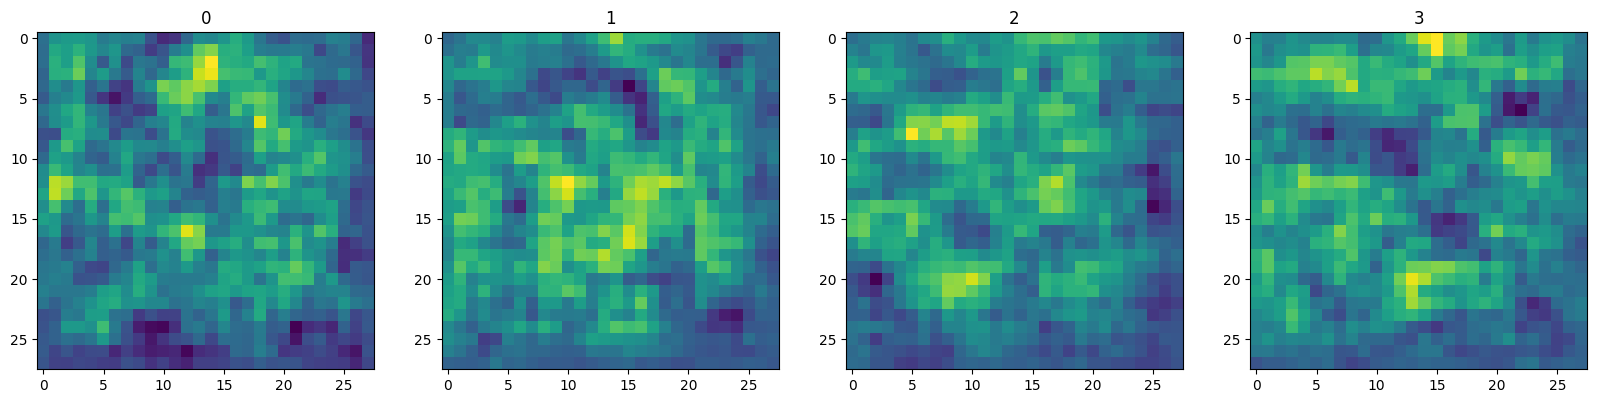

In [17]:
# Generate new fashion
img = generator.predict(np.random.randn(4,128,1))
# setup the subplot formatting
fig,ax = plt.subplots(ncols=4,figsize=(20,20))

for idx,img in enumerate(img):
  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)

## Building the Discriminator

In [18]:
# Buildingb the discriminator
def build_discriminator():
  model = Sequential()

  # First Conv Block
  model.add(Conv2D(32,5,input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Second Conv block
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Third Conv block
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Fourth Conv block
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))


  # Flatten then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.2))
  model.add(Dense(1,activation='sigmoid'))



  return model

In [19]:
discrminator = build_discriminator()

In [20]:
discrminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [21]:
np.expand_dims(img,0).shape

(1, 28, 28, 1)

In [24]:
discrminator.predict(img)

1/1 [==============================] - 0s 380ms/step


array([[0.50007683],
       [0.50020516],
       [0.50021297],
       [0.50040853]], dtype=float32)

## Construct the Training Loop

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [26]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

## Build Subclassed model

In [27]:
# Importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [28]:
class FashionGAN(Model):
  def __init__(self,generator,discrminator,*args, **kwargs):

    # Pass through args and kwargs to base class
    super().__init__(*args, **kwargs)

    # Create attributes for gen and disc
    self.generator = generator
    self.discriminator = discrminator

  def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    # Compile with base class
    super().compile(*args, **kwargs)

    # Create attributes for losses and optimizer
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss

  def train_step(self,batch):
    # Get the data
    real_images = batch
    fake_images = self.generator(tf.random.normal((128,128,1)),training = False)


    # Train the discriminator
    with tf.GradientTape() as d_tape:
      # Pass the real and fake images to the discrmimnator
      yhat_real = self.discriminator(real_images,training=True)
      yhat_fake = self.discriminator(fake_images,training=True)
      yhat_realfake=tf.concat([yhat_real,yhat_fake],axis=0)
      # Create labls for real and fake images
      y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)
      # Add some noise to the true outputs
      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15*tf.random.normal(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real,noise_fake],axis=0)
      # Calculate the loss
      total_d_loss = self.d_loss(y_realfake,yhat_realfake)
    # Apply back propogation -- nnlearn
    dgrad = d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))

    # Train the generator
    with tf.GradientTape() as g_tape:
      # Generate new images
      gen_images = self.generator(tf.random.normal((128,128,1)), training = True)
      # Create the predictd labels
      predicted_labels = self.discriminator(gen_images,training=False)
      # Calculate the loss
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)
    # Apply the backprop
    ggrad = g_tape.gradient(total_g_loss,self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))

    return {"d_loss":total_d_loss,"g_loss":total_g_loss}

In [29]:
# Create instance of subclassed model
fashgan = FashionGAN(generator,discrminator)

In [30]:
# Compile the model
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

## Build a callback

In [31]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [42]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('/100epochs', f'generated_img_{epoch}_{i}.png'))

In [43]:
hist = fashgan.fit(ds,epochs = 100 ,callbacks=[ModelMonitor()])

Epoch 1/100
  6/469 [..............................] - ETA: 1:14 - d_loss: 0.2334 - g_loss: 0.0480

469/469 [==============================] - 79s 169ms/step - d_loss: 0.1969 - g_loss: 0.0533
Epoch 2/100
469/469 [==============================] - 79s 168ms/step - d_loss: 0.1782 - g_loss: 0.0363
Epoch 3/100
469/469 [==============================] - 79s 168ms/step - d_loss: 0.3385 - g_loss: 0.0686
Epoch 4/100
469/469 [==============================] - 79s 168ms/step - d_loss: 0.6484 - g_loss: 0.3854
Epoch 5/100
469/469 [==============================] - 79s 168ms/step - d_loss: 0.6012 - g_loss: 0.4614
Epoch 6/100
469/469 [==============================] - 79s 168ms/step - d_loss: 0.5151 - g_loss: 0.4618
Epoch 7/100
469/469 [==============================] - 79s 168ms/step - d_loss: 0.5170 - g_loss: 0.2618
Epoch 8/100
469/469 [==============================] - 79s 168ms/step - d_loss: 0.6544 - g_loss: 0.5997
Epoch 9/100
469/469 [==============================] - 79s 168ms/step - d_loss: 0.6174 - g_loss: 0.5411
Epoch 10/100
469/469 [==============================] - 79s 168ms/step - d_l

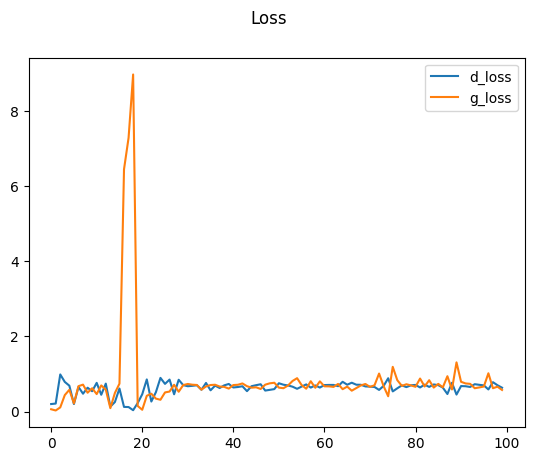

In [44]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'],label = 'd_loss')
plt.plot(hist.history['g_loss'],label='g_loss')
plt.legend()
plt.show()

In [50]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

1/1 [==============================] - 0s 20ms/step


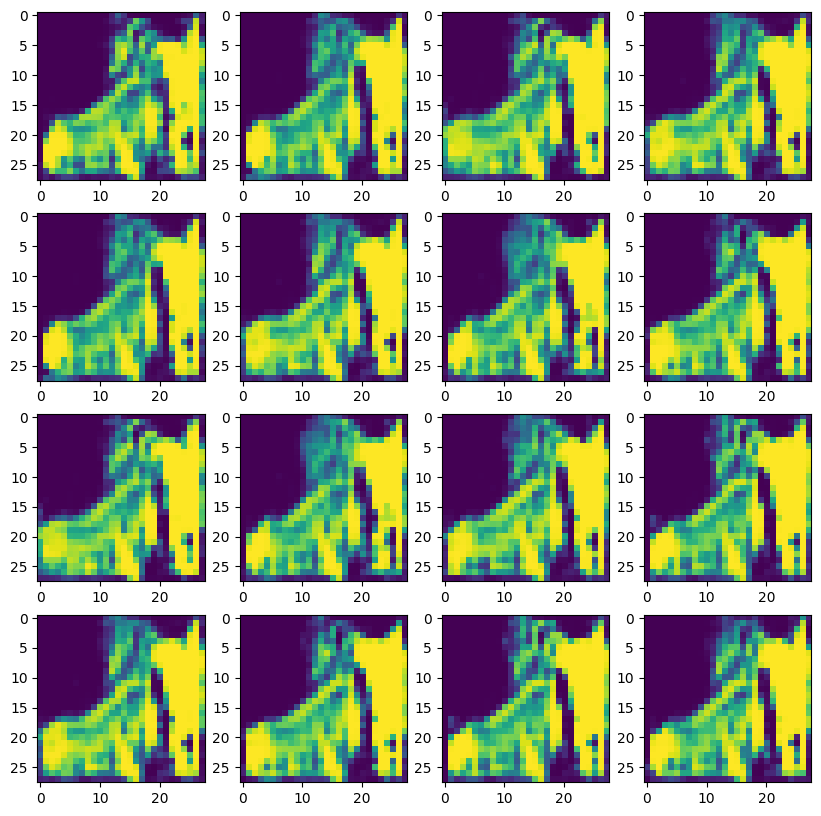

In [51]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])